<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 8

In [1]:
install.packages(c("coda","mvtnorm","devtools","loo","dagitty"))
devtools::install_github("rmcelreath/rethinking@slim")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘numDeriv’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘abind’, ‘tensorA’, ‘distributional’, ‘Rcpp’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’, ‘checkmate’, ‘matrixStats’, ‘posterior’, ‘V8’





shape (NA -> 1.4.6.1) [CRAN]


Installing 1 packages: shape

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpnTGTPp/remotes1b13ef7fe4a/rmcelreath-rethinking-cbcb8ba/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.13.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(rethinking)

Loading required package: parallel

rethinking (Version 2.13.2)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




## Easy

### 8E1
#### Question
For each of the causal relationships below, name a hypothetical third variable that would lead to an interaction effect.  
> (1) Bread dough rises because of yeast.  

> (2) Education leads to higher income.  

> (3) Gasoline makes a car go.

#### Answers
> (1) (Had to google "How does yeast make bread rise")  Yeast gobbles up sugar in the dough, releasing gasses that are trapped in the matrix of the dough and causes rising.  This means that *sugar* is a third variable that would lead to an interaction; something like $rise = \alpha + ... + \beta_{y \times s} \times yeast \times sugar$.

> (2) Education may lead to higher income, depending on the area of specialization.  E.g., an investment banker will probably make more than a nurse.  So there is an interaction term like $income = \alpha + ... + \beta_{e \times s} \times education \times specialization$

> (3) Gas powers a car, contingent on the proper function of the rest of the car.  E.g., a car with no wheels will not move regardless of how much gas you give it.  $GO = \alpha + ... + \beta_{g \times w} \times gas \times functioning$


### 8E2-8E3
#### Question E2
Which of the following explanations invokes an interaction?  

> (1) Caramelizing onions requires cooking over low heat and making sure the onions do not dry out.  

> (2) A car will go faster when it has more cylinders or when it has a better fuel injector.  

> (3) Most people acquire their political beliefs from their parents, unless they get them instead from their friends.  

> (4) Intelligent animal species tend to be either highly social or have manipulative appendages (hands, tentacles, etc.).

#### Question E3
For each of the explanations in 8E2, write a linear model that expresses the stated relationship.

##### Answers
> (1) I don't know how carmelizing works, either.  Google tells me that it involves the non-enzymatic breakdown of sugar and the removal of water (which seems to contradict the question).  I think there's an interaction here since (I imagine, heat will not carmelize an onion if it's submerged in a pot of boiling water--so the effect of heat depends on moisture.  $$C = \beta_H H + \beta_M M + \beta_{HM} H M$$.  I don't have an intercept here because I imagine that no heat will produce no carmelizing.

> (2) I'm going to imagine that this could be an interactive effect: a car with more cylinders will perform better-than-linearly with more better fuel injectors.  In this case, $$S = \beta_C C + \beta_F F + \beta_{CF} C F$$.  But I could also imagine that any ole fuel injector will do the trick as long as it works, in which case, this is additive like $$S = \beta_C C + \beta_F F$$. Again, I don't have an intercept because a car with no cylinders probably won't go very fast...

> (3) This one is tricky.  It's describing an either-or situation.  Either a person gets their political beliefs from their parents or from their friends.  But this is NOT an interaction, as we've learned so far, since the effect of parents does not depend on the effect of friends.  We will later learn that the one's political beliefs may not be a linear function, and that this will cause interaction between parents and friends...just not interaction in the way we've learned so far.  So I'm going to say a linear model is like $$P = \alpha + \beta_I I$$, where $I$ is an indicator variable representing the source of influence (parents or friends).

> (4) No interaction here: the effect of sociality is not be described as being modulated by the effect of appendages (and vice versa).  $$I = \alpha + \beta_S S + \beta_A A$$

## Medium

### 8M1
Recall the tulips example from the chapter. Suppose another set of treatments adjusted the temperature in the greenhouse over two levels: cold and hot. The data in the chapter were collected at the cold temperature. You find none of the plants grown under the hot temperature developed any blooms at all, regardless of the water and shade levels. Can you explain this result in terms of interactions between water, shade, and temperature?

#### Answer
In the chapter, the final model used was

$$\mu_i = \alpha + \beta_W w_i + \beta_S s_i + \beta_{WS} w_i s_i$$

Now we're asked about another explanatory variable *heat*.  We find that *heat* has completely prevented any tulips in our sample to grow.  So apparently, there is an interaction of *water* and *shade* with *heat*: the effect of *water*, *shade*, and the interaction of *water and shade* depends on *heat*.

### 8M2
Can you invent a regression equation that would make the bloom size zero, whenever the temperature is hot?

#### Answer
We might think that a regression would look like

$$\mu_i = \alpha + \beta_W w_i + \beta_S s_i + \beta_H h_i +
\beta_{WS} w_i s_i + \beta_{WH} w_i h_i + \beta_{SH} s_i h_i +
\beta_{WSH} w_i s_i h_i$$

but our results suggest something different.  In this formula, *heat* might zero-out any term that include $h$, but the means that terms $\alpha + \beta_W w_i + \beta_S s_i + \beta_{WS} w_i s_i$ could lead to non-zero blooms.  Apparently, *heat* interacts with these too.  So we might have the following regression instead:

$$\mu_i = (1 - h_i) (\alpha + \beta_W w_i + \beta_S s_i + \beta_{WS} w_i s_i)$$

Now, when *heat* is applicable, $(1 - h_i) = 0$ such that $\mu_i = 0$ too.

### 8M3
In parts of North America, ravens depend upon wolves for their food. This is because ravens are carnivorous but cannot usually kill or open carcasses of prey. Wolves however can and do kill and tear open animals, and they tolerate ravens co-feeding at their kills. This species relationship is generally described as a “species interaction.” Can you invent a hypothetical set of data on raven population size in which this relationship would manifest as a statistical interaction? Do you think the biological interaction could be linear? Why or why not?

#### Answer
The way "species interaction" is described, it is NOT a *statistical* interaction.  The description of a species interaction is really describing a *statistical dependency*, where $P_{wolf}$ is an explanatory variable in a regression representing the outcome $P_{raven}$.  For example, the question could be describing a regression like:

$$P_{raven} = \alpha + \beta_W P_{wolf} + ...$$

In order for there to be a statistical interaction between $P_{raven}$ and $P_{wolf}$, $P_{raven}$ would have to enter the right-hand side of the regression--$P_{raven}$ would depend on itself (this can be modeled with differential equations, which the book will go with later chapters).

Nevertheless, there may be (statistical) interaction terms in the regression for $P_{raven}$ that do not include $P_{raven}$ as an explanatory variable.  For example, the populations of small prey (which the ravens may be able to hunt themselves, without relying on the prowess of wolves) and the large prey (which the ravens can take advantage of via the efforts of wolves).  Now we might have several interaction terms.

$$P_{raven} = \alpha +
\beta_W P_{wolf} + \beta_S P_{sm.prey} + \beta_L P_{lg.prey} +
\beta_{WS} P_{wolf} P_{sm.prey} + \beta_{WL} P_{wolf} P_{lg.prey} + \beta_{SL} P_{sm.prey} P_{lg.prey} +
\beta_{WSL} P_{wolf} P_{sm.prey} P_{lg.prey}$$

Some of these terms may not make sense in ecological reality.  For example, $\beta_{WS} P_{wolf} P_{sm.prey} = \beta_{SL} P_{sm.prey} P_{lg.prey} = 0$ if wolves don't hunt small prey and prey of different sizes don't affect the availability of either sized prey.  So we might have:

$$P_{raven} = \alpha +
\beta_W P_{wolf} + \beta_S P_{sm.prey} + \beta_L P_{lg.prey}
+ \beta_{WL} P_{wolf} P_{lg.prey} +
\beta_{WSL} P_{wolf} P_{sm.prey} P_{lg.prey}$$

So let's simulate some data here.

In [ ]:
n <- 1000
pWolf <- round(runif(n=n, min=0, max=100), 0)
pSm <- round(runif(n=n, min=0, max=100), 0)
pLg <- round(pmax(runif(n=n, min=0, max=100) - 0.1*pWolf, 0), 0)
pRaven <- round(50 + 0*pWolf + 0.0001*pSm + 0.0002*pWolf*pLg + 0.0003*pWolf*pSm*pLg, 0)

d <- data.frame(pWolf=pWolf, pSm=pSm, pLg=pLg, pRaven=pRaven)
head(d)

,pWolf,pSm,pLg,pRaven
,<dbl>,<dbl>,<dbl>,<dbl>
1,6,10,38,51
2,33,56,82,96
3,52,14,80,68
4,85,93,43,153
5,23,1,87,51
6,13,28,12,51


### 8M4
Repeat the tulips analysis, but this time use priors that constrain the effect of water to be positive and the effect of shade to be negative. Use prior predictive simulation. What do these prior assumptions mean for the interaction prior, if anything?

#### Answer
First, why would we want to contrain the priors in this way?  It's presumably because we have *prior* knowledge (or are making the assumption) that water and sunshine never lead to smaller blooms.  I can imagine that this is not always the case; excessive water or sunshine might harm/kill the plant.  But as long as we share our model, we are making explicit our assumptions such that others can judge for themselves how appropriate our conclusions are and under what circumstances they may be applicable.

So we need to go back into the chapter to find model `m8.5` (there's also `m8.4`, which is just like `m8.5` but without an interaction term; since this chapter is about interactions, I'll stick to `m8.5`).  Let's get the data loaded; remember, we'll standardize/center the data as per the example in the chapter.

In [ ]:
data(tulips)
d <- tulips
d$blooms_std <- d$blooms / max(d$blooms)
d$water_cent <- d$water - mean(d$water)
d$shade_cent <- d$shade - mean(d$shade)

Now let's look at `m8.5`.

In [ ]:
m8.5 <- quap(
  alist(
    blooms_std ~ dnorm(mu, sigma),
      mu <- a + bw*water_cent + bs*shade_cent + bws*water_cent*shade_cent,
        a ~ dnorm(0.5, 0.25),
        bw ~ dnorm(0, 0.25),
        bs ~ dnorm(0, 0.25),
        bws ~ dnorm(0, 0.25),
      sigma ~ dexp(1)
  ), data=d)

There's a few ways to impose our contraints.  One is to simply add a `constrainsts` argument to our model

In [ ]:
m8.5 <- quap(
  alist(
    blooms_std ~ dnorm(mu, sigma),
      mu <- a + bw*water_cent + bs*shade_cent + bws*water_cent*shade_cent,
        a ~ dnorm(0.5, 0.25),
        bw ~ dnorm(0, 0.25),
        bs ~ dnorm(0, 0.25),
        bws ~ dnorm(0, 0.25),
      sigma ~ dexp(1)
  ), data=d,
     constraints=list(bw="lower=0",
                      bs="upper=0",
                      bws="upper=0"))

ERROR: Error in quap(alist(blooms_std ~ dnorm(mu, sigma), mu <- a + bw * water_cent + : unused argument (constraints = list("lower=0", "upper=0", "upper=0"))


Unfortunately, this feature doesn't work with `quap`; we'll have to wait for later chapters when we replace `quap` with `ulam`.

So instead, we need to fiddle with the meat of the model.
*   We can ensure `bw` is positive by defining its prior with a non-negative distribution.  Probably the most familiar such distribution is the log-normal distribution (`bw ~ dlnorm()`)
*   We can similary ensure that `bs` is negative by also using a non-negative distribution (`bs ~ dlnorm()`) and then negating its value in the linear equation (`mu <- ... -bs*shade_cent + ...`).
*   What about the ineraction term.  Well, more shade should decrease the effect of more water.  So we can use the same methods as for `bs` (`bws ~ dlnorm()`; `mu <- ... - bws*water_cent*shade_cent`)

I'm not sure what the priors should be with these new priors, so let's just try the existing values.

In [ ]:
m8M4 <- quap(
  alist(
    blooms_std ~ dnorm(mu, sigma),
      mu <- a + bw*water_cent - bs*shade_cent - bws*water_cent*shade_cent,
        a ~ dnorm(0.5, 0.25),
        bw ~ dlnorm(0, 0.25),
        bs ~ dlnorm(0, 0.25),
        bws ~ dlnorm(0, 0.25),
      sigma ~ dexp(1)
  ), data=d)

To get the priors...

In [ ]:
priors <- extract.prior(m8M4)
str(priors)

List of 5
 $ a    : num [1:1000(1d)] 0.486 0.307 0.433 0.923 0.317 ...
 $ bw   : num [1:1000(1d)] 1.245 0.693 0.777 1.526 0.719 ...
 $ bs   : num [1:1000(1d)] 0.9 1.14 1.13 0.7 1.09 ...
 $ bws  : num [1:1000(1d)] 1.029 1.064 0.755 1.072 1.078 ...
 $ sigma: num [1:1000(1d)] 2.248 0.629 0.646 0.969 1.955 ...
 - attr(*, "source")= chr "quap prior: 1000 samples from m8M4"


Now we have 1,000 draws for each parameter.  We need to combine them in such a way to display the relationships between the outcome variable `blooms_std` and the explanatory variables `shade_cent` and `water_cent`, **holding one explanatory variable constant**.  Let's use the "triptych" plot idea, mentioned in section 8.3.3.  I'm going to copy-and-modify code block `8.25` for this.

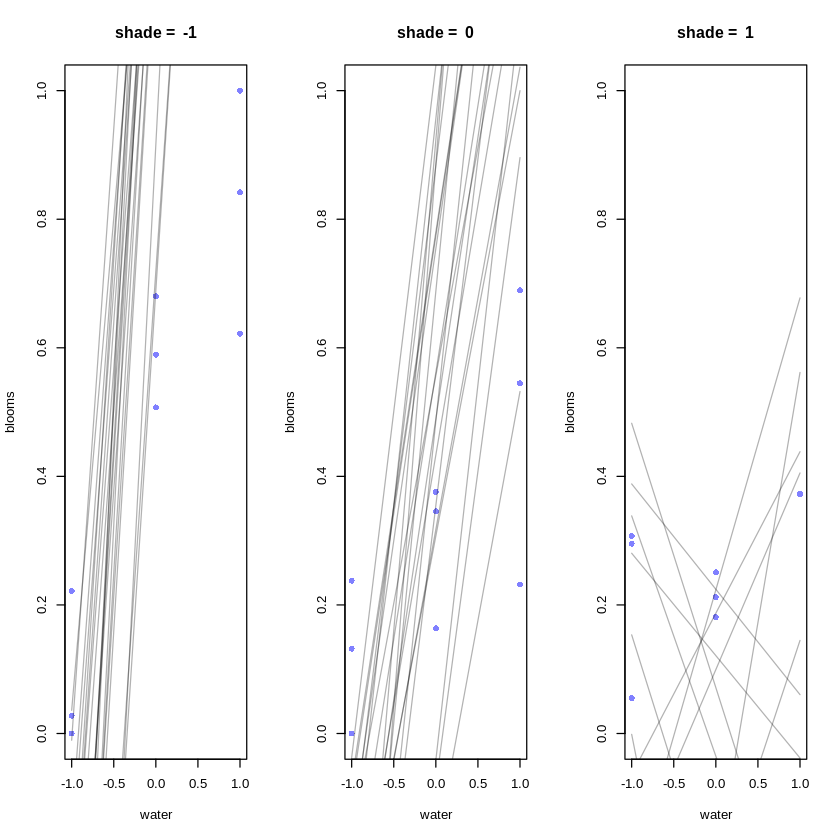

In [ ]:
par(mfrow=c(1,3)) #3 plots in 1 row
for (s in -1:1) {
  idx <- which(d$shade_cent==s)
  plot(d$water_cent[idx], d$blooms_std[idx],
       xlim=c(-1,1), ylim=c(0,1),
       xlab="water", ylab="blooms",
       pch=16, col=rangi2,
       main=paste("shade = ", s))
  mu <- link(m8M4, post=priors, # make sure you include this modification!
             data=data.frame(shade_cent=s, water_cent=-1:1))
  for (i in 1:20) lines( -1:1, mu[i,], col=col.alpha("black",0.3))
  }

Looks like that set of priors has missed the mark; especially for `shade = -1` and `shade = 1`, our priors make no contact with the data.  Our goal is not to replicate the data, but to allow our model to explore where we know data lives.  Let's do better.  Given the sharp slope for `shade = -1`, we at least know that we need to favor a lower prior for `bw`.  This also holds for `bs` and/or `bws` given the shift of lines from plot to plot.

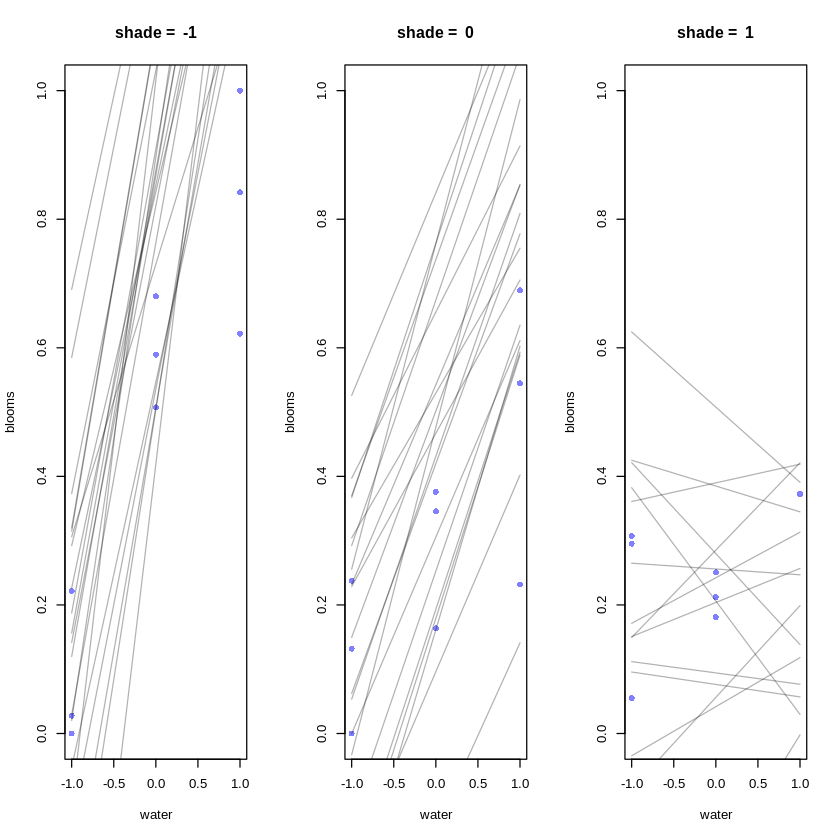

In [ ]:
m8M4b <- quap(
  alist(
    blooms_std ~ dnorm( mu, sigma),
      mu <- a + bw*water_cent - bs*shade_cent - bws*water_cent*shade_cent,
        a ~ dnorm(0.5, 0.25),
        bw ~ dlnorm(-1, 0.25),
        bs ~ dlnorm(-1, 0.25),
        bws ~ dlnorm(-1, 0.25),
      sigma ~ dexp(1)
  ), data=d)

priorsb <- extract.prior(m8M4b)

par(mfrow=c(1,3)) #3 plots in 1 row
for (s in -1:1) {
  idx <- which(d$shade_cent==s)
  plot(d$water_cent[idx], d$blooms_std[idx],
       xlim=c(-1,1), ylim=c(0,1),
       xlab="water", ylab="blooms",
       pch=16, col=rangi2,
       main=paste("shade = ", s))
  mu <- link(m8M4, post=priorsb, # make sure you include this modification!
             data=data.frame(shade_cent=s, water_cent=-1:1))
  for (i in 1:20) lines( -1:1, mu[i,], col=col.alpha("black",0.3))
  }

That looks better.  But I can imagine going even smaller since the `shade = 1` plot is still missing quite a bit of data.

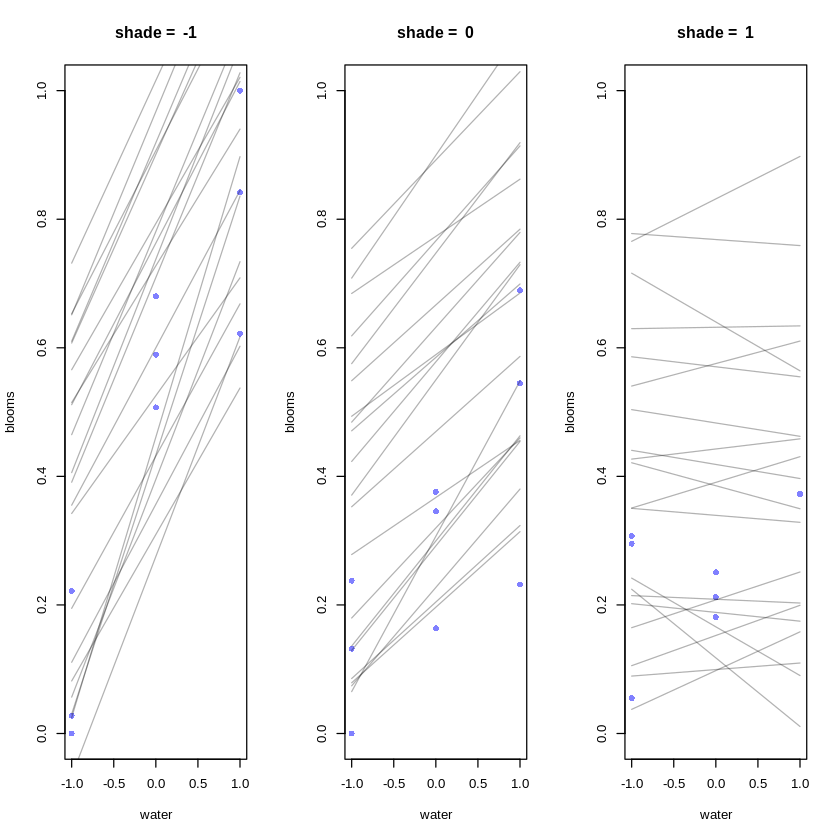

In [ ]:
m8M4c <- quap(
  alist(
    blooms_std ~ dnorm( mu, sigma),
      mu <- a + bw*water_cent - bs*shade_cent - bws*water_cent*shade_cent,
        a ~ dnorm(0.5, 0.25),
        bw ~ dlnorm(-2, 0.25),
        bs ~ dlnorm(-2, 0.25),
        bws ~ dlnorm(-2, 0.25),
      sigma ~ dexp(1)
  ), data=d)

priorsc <- extract.prior(m8M4c)

par(mfrow=c(1,3)) #3 plots in 1 row
for (s in -1:1) {
  idx <- which(d$shade_cent==s)
  plot(d$water_cent[idx], d$blooms_std[idx],
       xlim=c(-1,1), ylim=c(0,1),
       xlab="water", ylab="blooms",
       pch=16, col=rangi2,
       main=paste("shade = ", s))
  mu <- link(m8M4, post=priorsc, # make sure you include this modification!
             data=data.frame(shade_cent=s, water_cent=-1:1))
  for (i in 1:20) lines( -1:1, mu[i,], col=col.alpha("black",0.3))
  }

Not bad.  Just for kicks, let's compare the posteriors to see what effect our priors had.

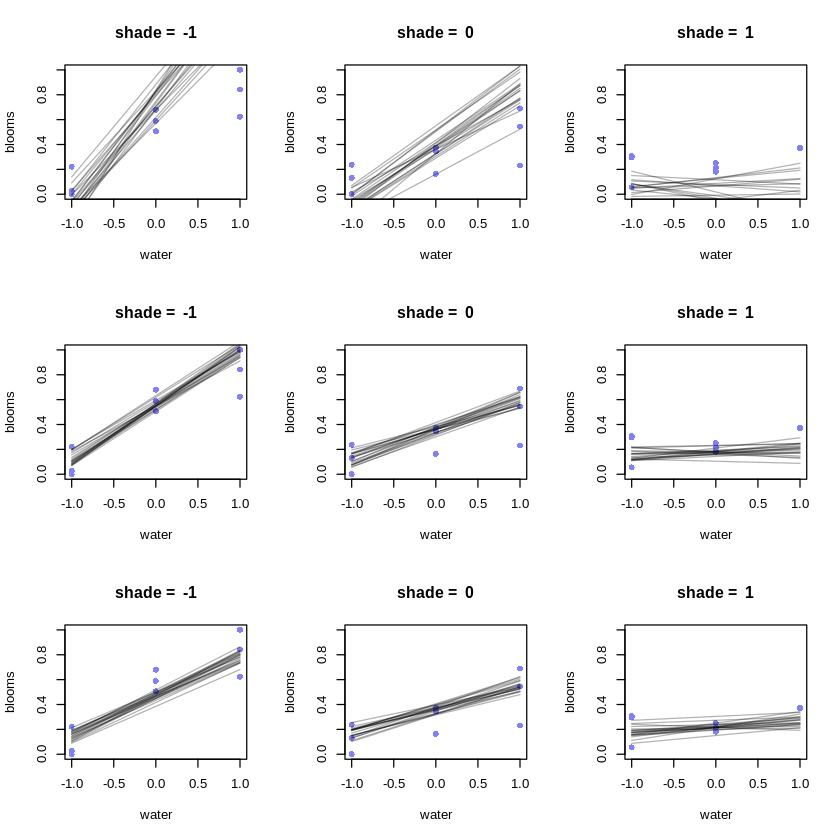

In [ ]:
post <- extract.samples(m8M4)
postb <- extract.samples(m8M4b)
postc <- extract.samples(m8M4c)

par(mfrow=c(3,3)) #3 plots in 1 row
for (s in -1:1) {
  idx <- which(d$shade_cent==s)
  plot(d$water_cent[idx], d$blooms_std[idx],
       xlim=c(-1,1), ylim=c(0,1),
       xlab="water", ylab="blooms",
       pch=16, col=rangi2,
       main=paste("shade = ", s))
  mu <- link(m8M4,
             data=data.frame(shade_cent=s, water_cent=-1:1))
  for (i in 1:20) lines( -1:1, mu[i,], col=col.alpha("black",0.3))
  }

#par(mfrow=c(1,3)) #3 plots in 1 row
for (s in -1:1) {
  idx <- which(d$shade_cent==s)
  plot(d$water_cent[idx], d$blooms_std[idx],
       xlim=c(-1,1), ylim=c(0,1),
       xlab="water", ylab="blooms",
       pch=16, col=rangi2,
       main=paste("shade = ", s))
  mu <- link(m8M4b,
             data=data.frame(shade_cent=s, water_cent=-1:1))
  for (i in 1:20) lines( -1:1, mu[i,], col=col.alpha("black",0.3))
  }

#par(mfrow=c(1,3)) #3 plots in 1 row
for (s in -1:1) {
  idx <- which(d$shade_cent==s)
  plot(d$water_cent[idx], d$blooms_std[idx],
       xlim=c(-1,1), ylim=c(0,1),
       xlab="water", ylab="blooms",
       pch=16, col=rangi2,
       main=paste("shade = ", s))
  mu <- link(m8M4c,
             data=data.frame(shade_cent=s, water_cent=-1:1))
  for (i in 1:20) lines( -1:1, mu[i,], col=col.alpha("black",0.3))
  }

Sure enough, the first set of priors yields posteriors that miss a lot of data.  The posteriors get better as we modified our priors.

## Hard

### 8H1
Return to the `data(tulips)` example in the chapter. Now include the bed variable as a predictor in the interaction model. Don’t interact bed with the other predictors; just include it as a main effect. Note that bed is categorical. So to use it properly, you will need to either construct dummy variables or rather an index variable, as explained in Chapter 5.

#### Answer
Let's get the data pulled up.

In [ ]:
data(tulips)
d <- tulips
d$blooms_std <- d$blooms / max(d$blooms)
d$water_cent <- d$water - mean(d$water)
d$shade_cent <- d$shade - mean(d$shade)

d$bed

[1] a a a a a a a a a b b b b b b b b b c c c c c c c c c
Levels: a b c

I'd prefer to use an index variable, rather than dummy variable, to get `bed` into our analysis.  The reasons are explained in the book, but briefly:

*   When you use dummy variables, there is no posterior (mean or variance) for the omitted level.  This makes interpretting the posterior difficult.  For instance, if you want to compare the omitted level to one of the encoded levels, there is no estimated variance for the omitted level such that it appears your posterior is *more* certain about that level.
*   Indexing gives the bonus of using pooled estimates, thus normalizing inference.

But if you wanted to use a dummy variable, you could do it like this:

In [ ]:
model.matrix(~d$bed)[,-1]

,d$bedb,d$bedc
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
10,1,0


Now let's include bed in our model.  In effect, we'll replace our intercept `a` with a separate intercept `a[bed]` for each `bed`.  

In [ ]:
m <- quap(
  alist(
    blooms_std ~ dnorm(mu, sigma),
      mu <- a[bed] + bw*water_cent + bs*shade_cent + bws*water_cent*shade_cent,
        a[bed] ~ dnorm(0.5, 0.25),
        bw ~ dnorm(0, 0.25),
        bs ~ dnorm(0, 0.25),
        bws ~ dnorm(0, 0.25),
      sigma ~ dexp(1)
  ), data=d)

round(precis(m, depth=2),2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.27,0.04,0.22,0.33
a[2],0.40,0.04,0.34,0.45
a[3],0.41,0.04,0.35,0.47
bw,0.21,0.03,0.17,0.25
bs,-0.11,0.03,-0.15,-0.07
bws,-0.14,0.03,-0.19,-0.09
sigma,0.11,0.01,0.08,0.13


All else being equal, `bed==a` did worse than the others, as evidence by `a[1] < a[2], a[3]`

### 8H2
Use WAIC to compare the model from `8H1` to a model that omits bed. What do you infer from this comparison? Can you reconcile the WAIC results with the posterior distribution of the bed coefficients?

#### Answer
We already have the model from question `8H1`; let's run the comparison model--the one without `bed`.  This is the same model that we ran in question `8M4`, which is `m8.5` from the chapter.

In [ ]:
m8.5 <- quap(
  alist(
    blooms_std ~ dnorm(mu, sigma),
      mu <- a + bw*water_cent + bs*shade_cent + bws*water_cent*shade_cent,
        a ~ dnorm(0.5, 0.25),
        bw ~ dnorm(0, 0.25),
        bs ~ dnorm(0, 0.25),
        bws ~ dnorm(0, 0.25),
      sigma ~ dexp(1)
  ), data=d)

  round(precis(m8.5),2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.36,0.02,0.32,0.40
bw,0.21,0.03,0.16,0.25
bs,-0.11,0.03,-0.16,-0.07
bws,-0.14,0.04,-0.20,-0.09
sigma,0.12,0.02,0.10,0.15


Let's compare them with WAIC (I'll also do PSIS)

In [ ]:
round(compare(m, m8.5, func=WAIC),2)
round(compare(m, m8.5, func=PSIS),2)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m,-23.97,9.92,0.0,NA,9.42,0.71
m8.5,-22.16,10.27,1.8,7.3,6.52,0.29


Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m8.5,-20.22,11.66,0.00,NA,7.52,0.54
m,-19.88,11.68,0.34,9.08,11.50,0.46


It's always a bit frustrating when WAIC and PSIS rank the models differently.  But notice that in both cases, `dSE >> dWAIC, dPSIS`.  In other words, both WAIC and PSIS estimate the difference between the models is small.  In either case, the `k > 1` values should make us a little suspicious of these models.

But let's ignore the `k` values.  What does the closeness in WAIC/PSIS of our models say?  Well, it says that including `bed` in our analysis does not do much to our predictive accuracy...which implies that `bed` was not an important factor in our results.

That might seem a bit counterintuitive; afterall, the coefficients for bed were reliably positive.  But that's NOT the right thing to look at.  Rather, notice that the coefficients for bed are pretty similar; thus, accounting for bed doesn't make *much* of a difference.  It *does* make *some* difference, according to WAIC--which is probably due to the inferior performance of `bed==a`--but apparently this difference isn't much.

### 8H3
Consider again the `data(rugged)` data on economic development and terrain ruggedness, examined in this chapter. One of the African countries in that example, Seychelles, is far outside the cloud of other nations, being a rare country with both relatively high GDP and high ruggedness. Seychelles is also unusual, in that it is a group of islands far from the coast of mainland Africa, and  its main economic activity is tourism.  

> (a) Focus on model `m8.5` (typo in book; I think this should be `m8.3`) from the chapter. Use WAIC pointwise penalties and PSIS Pareto *k* values to measure relative influence of each country. By these criteria, is Seychelles influencing the results? Are there other nations that are relatively influential? If so, can you explain why?

> (b) Now use robust regression, as described in the previous chapter. Modify `m8.5` (typo in book; I think this should be `m8.3`) to use a Student-t distribution with $ν = 2$. Does this change the results in a substantial way?

#### Answer
Let's start by loading and manipulating the data as was done earlier in the chapter.

##### (a)


In [3]:
data(rugged)
d <- rugged
d$log_gdp <- log(d$rgdppc_2000)
dd <- d[ complete.cases(d$rgdppc_2000) , ]
dd$log_gdp_std <- dd$log_gdp / mean(dd$log_gdp)
dd$rugged_std <- dd$rugged / max(dd$rugged)
dd$cid <- ifelse(dd$cont_africa==1, 1, 2)

Now we need to get `m8.5` up and going.

In [4]:
m8.3 <- quap(
  alist(
    log_gdp_std ~ dnorm(mu,sigma) ,
      mu <- a[cid] + b[cid]*(rugged_std - 0.215) ,
        a[cid] ~ dnorm(1,0.1) ,
        b[cid] ~ dnorm(0,0.3) ,
      sigma ~ dexp( 1 )
), data=dd)

##### (a)
Let's look at the pointwise WAIC penalties and pointwise PSIS *k* values.

In [5]:
WAIC_pp <- data.frame("country" = dd$country,
                      "WAIC_p" = round(WAIC(m8.3, pointwise=TRUE)$penalty,2))
WAIC_pp <- WAIC_pp[order(WAIC_pp$WAIC_p, decreasing=TRUE),]

PSIS_pk <- data.frame("country" = dd$country,
                      "PSIS_k" = PSISk(m8.3, pointwise=TRUE))
PSIS_pk <- PSIS_pk[order(PSIS_pk$PSIS_k, decreasing=TRUE),]

penalties <- merge(x=PSIS_pk, y=WAIC_pp, by="country")
(penalties <- penalties[order(penalties$PSIS_k, decreasing=TRUE),])

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.



,country,PSIS_k,WAIC_p
,<fct>,<dbl>,<dbl>
20,Botswana,0.53,0.11
146,Switzerland,0.52,0.45
49,Equatorial Guinea,0.51,0.22
89,Lesotho,0.48,0.27
8,Austria,0.40,0.15
57,Gabon,0.39,0.07
148,Tajikistan,0.37,0.32
62,Greece,0.33,0.04
105,Nepal,0.29,0.13


***Is Seychelles influential?***  I guess this depends on what we mean by influential.  Run this several times and you'll see that Seychelles is usually (among) the top spot.  At the same time, its *k* value rarely exceed 0.7.  We could get a sense of how influential it is by omitting it from the model and comparing that posterior to the posterior ran on the full dataset.

In [6]:
dd_noSey <- dd[dd$country!="Seychelles",]

m8.3_noSey <- quap(
  alist(
    log_gdp_std ~ dnorm(mu,sigma) ,
      mu <- a[cid] + b[cid]*(rugged_std - 0.215) ,
        a[cid] ~ dnorm(1,0.1) ,
        b[cid] ~ dnorm(0,0.3) ,
      sigma ~ dexp( 1 )
), data=dd_noSey)

round(precis(m8.3, depth=2),2)
round(precis(m8.3_noSey, depth=2),2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.89,0.02,0.86,0.91
a[2],1.05,0.01,1.03,1.07
b[1],0.13,0.07,0.01,0.25
b[2],-0.14,0.05,-0.23,-0.06
sigma,0.11,0.01,0.10,0.12


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.88,0.02,0.85,0.91
a[2],1.05,0.01,1.03,1.07
b[1],0.07,0.08,-0.06,0.20
b[2],-0.14,0.05,-0.23,-0.06
sigma,0.11,0.01,0.10,0.12


I don't know that these difference mean much.  It would be better to run counterfactual simulations.  But let's just predict Seychelles with the `m8.3_noSey` model to see how close we come; if we're far off, this would indicate that Seychelles was an influential data point.

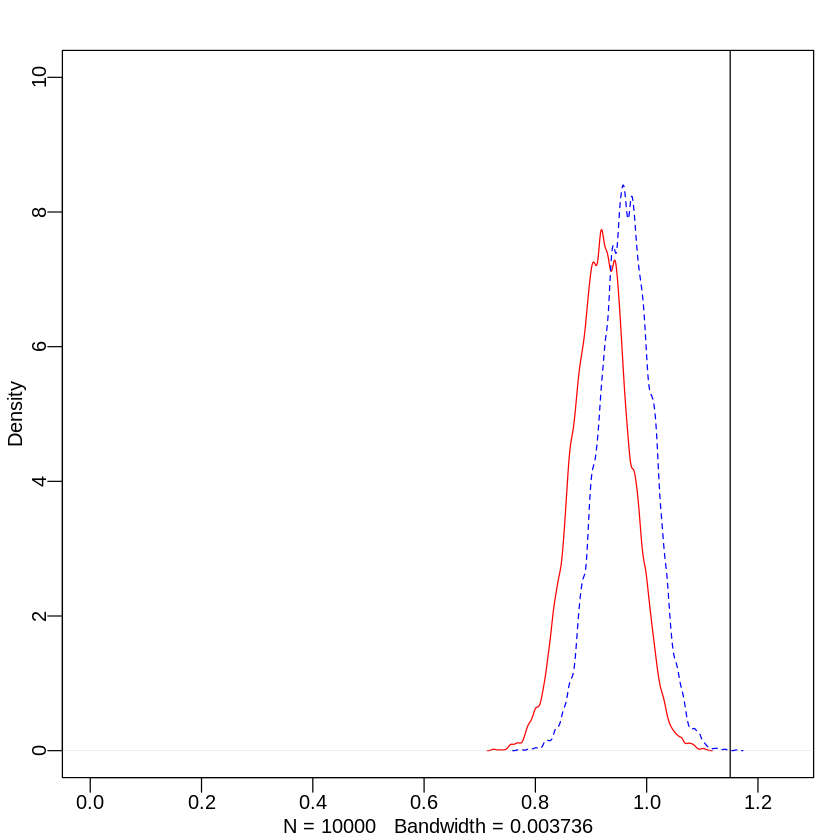

In [7]:
post <- extract.samples(m8.3)
post_noSey <- extract.samples(m8.3_noSey)

Sey_mean <- with(post, a[,1] + b[,1]*(dd[dd$country=="Seychelles", "rugged_std"] - 0.215))
Sey_mean_noSey <- with(post_noSey, a[,1] + b[,1]*(dd[dd$country=="Seychelles", "rugged_std"] - 0.215))

dens(Sey_mean_noSey, col="red", xlim=c(0, 1.25), ylim=c(0,10))
dens(Sey_mean, col="blue", lty=2, add=TRUE)
abline(v=dd[dd$country=="Seychelles", "log_gdp_std"])

So the model doesn't do great with this influential observation.  How will it do with a non-influential observation?

,country,PSIS_k,WAIC_p
,<fct>,<dbl>,<dbl>
141,Spain,0.09,0.01
147,Syrian Arab Republic,0.09,0.01
27,Canada,0.08,0.02
77,Israel,0.08,0.02
69,Honduras,0.07,0.01
143,Sudan,0.07,0.00
6,Armenia,0.06,0.02
33,Colombia,0.06,0.00
72,Iceland,0.06,0.02


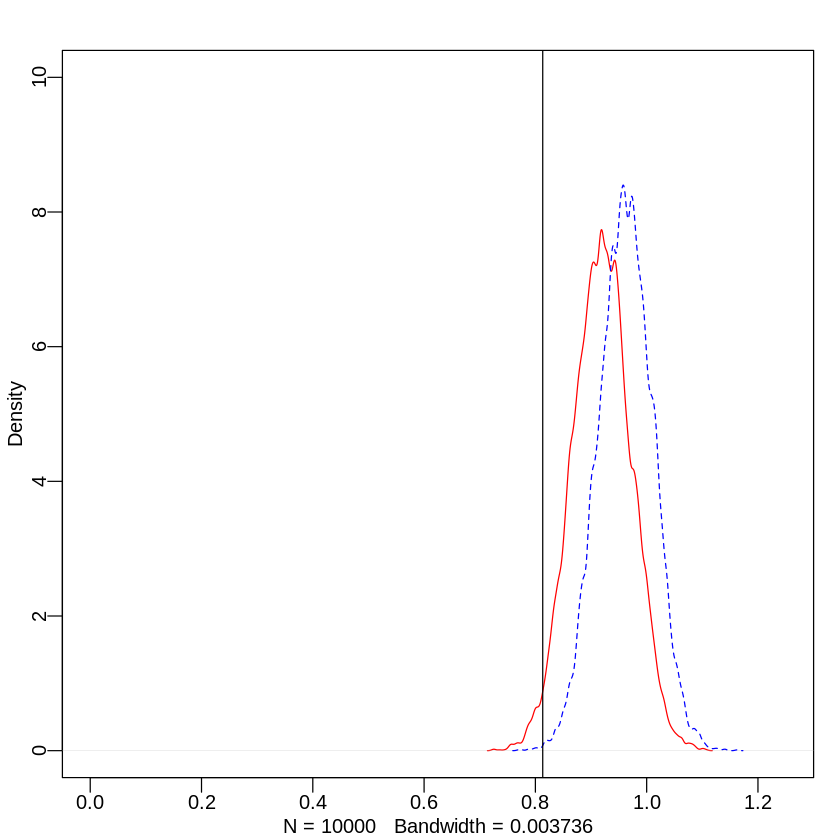

In [8]:
tail(penalties, 100)

Kenya_mean <- with(post, a[,2] + b[,2]*(dd[dd$country=="Kenya", "rugged_std"] - 0.215))
Kenya_mean_noSey <- with(post_noSey, a[,1] + b[,1]*(dd[dd$country=="Kenya", "rugged_std"] - 0.215))

dens(Sey_mean_noSey, col="red", xlim=c(0, 1.25), ylim=c(0,10))
dens(Sey_mean, col="blue", lty=2, add=TRUE)
abline(v=dd[dd$country=="Kenya", "log_gdp_std"])

In this case, omitting the influential observation does a little better.  We could continue do this for other countries, but that's good for now.

***Are other countries influential?*** Sure, by the same criteria that we're assessing the influence of Seychelles.

##### (b)
Now we'll change the regression so that `log_gdp_std ~ student_t`.

In [9]:
m8.3_t <- quap(
  alist(
    log_gdp_std ~ dstudent(2, mu,sigma) ,
      mu <- a[cid] + b[cid]*(rugged_std - 0.215) ,
        a[cid] ~ dnorm(1,0.1) ,
        b[cid] ~ dnorm(0,0.3) ,
      sigma ~ dexp( 1 )
), data=dd)

We could start by comparing the posterior summaries of the two models:

In [10]:
round(precis(m8.3, depth=2), 2)
round(precis(m8.3_t, depth=2), 2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.89,0.02,0.86,0.91
a[2],1.05,0.01,1.03,1.07
b[1],0.13,0.07,0.01,0.25
b[2],-0.14,0.05,-0.23,-0.06
sigma,0.11,0.01,0.10,0.12


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.86,0.02,0.84,0.89
a[2],1.05,0.01,1.03,1.06
b[1],0.11,0.08,-0.01,0.23
b[2],-0.21,0.06,-0.32,-0.11
sigma,0.08,0.01,0.07,0.10


But it's hard to know the implication of these posteriors.  We want to know if changing to a t-distribution affects the results.  I guess we need to specify *which* results we're concened with.  In the chapter, I think we were mostly interested in the difference between African and non-African countries in effect of `rugged_std` on `log_gdp_std`.  So let's look at that.

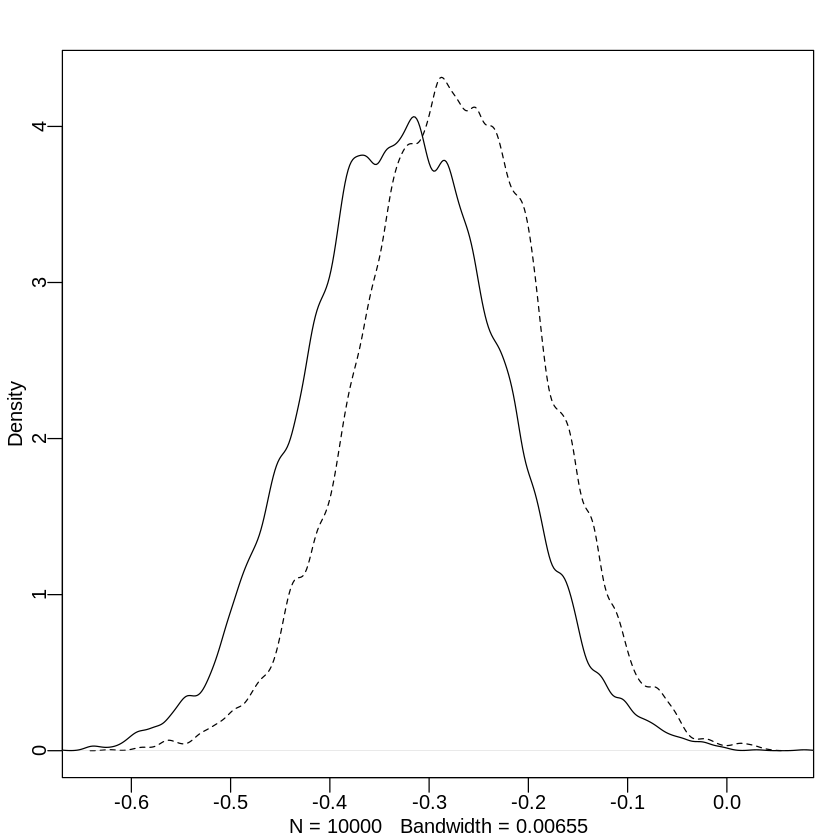

In [11]:
post <- extract.samples(m8.3)
post_t <- extract.samples(m8.3_t)

dif <- with(post, b[,2] - b[,1])
dif_t <- with(post_t, b[,2] - b[,1])

dens(dif, lty=2)
dens(dif_t, add=TRUE)

Indeed, changing to a t-distribution.  Let's also compare the models to see which is expected to perform better out of sample.

In [12]:
compare(m8.3, m8.3_t, func=WAIC)
compare(m8.3, m8.3_t, func=PSIS)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m8.3,-259.2370,15.23201,0.00000,NA,5.087693,1.000000e+00
m8.3_t,-221.8972,18.03117,37.33978,5.804029,5.717254,7.794154e-09


Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m8.3,-258.7249,15.34603,0.00000,NA,5.360540,1.000000e+00
m8.3_t,-221.8683,18.16376,36.85661,5.899839,5.750445,9.924049e-09


Interesting, the normal model, hands down.

### 8H4
The values in `data(nettle)` are data on language diversity in 74 nations[143].
The meaning of each column is given below.

1. `country`: Name of the country  
2. `num.lang`: Number of recognized languages spoken  
3. `area`: Area in square kilometers  
4. `k.pop`: Population, in thousands  
5. `num.stations`: Number of weather stations that provided data for the next two columns  
6. `mean.growing.season`: Average length of growing season, in months  
7. `sd.growing.season`: Standard deviation of length of growing season, in months  

Use these data to evaluate the hypothesis that language diversity is partly a product of food security. The notion is that, in productive ecologies, people don’t need large social networks to buffer them against risk of food shortfalls. This means cultural groups can be smaller and more self-sufficient, leading to more languages per capita. Use the number of languages per capita as the outcome:

**R code 8.27**
```
d$lang.per.cap <- d$num.lang/ d$k.pop
```

Use the logarithm of this new variable as your regression outcome. (A count model would be better here, but you’ll learn those later, in Chapter 11). This problem is open ended, allowing you to decide how you address the hypotheses and the uncertain advice the modeling provides. If you think you need to use WAIC anyplace, please do. If you think you need certain priors, argue for  them. If you think you need to plot predictions in a certain way, please do. Just try to honestly evaluate the main effects of both `mean.growing.season` and `sd.growing.season`, as well as their two-way interaction. Here are three parts to help.

> (a) Evaluate the hypothesis that language diversity, as measured by `log(lang.per.cap)`, is positively associated with the average length of the growing season, `mean.growing.season`. Consider `log(area)` in your regression(s) as a covariate (not  an interaction). Interpret your results.

> (b) Now evaluate the hypothesis that language diversity is negatively associated with the standard deviation of length of growing season, `sd.growing.season`.  This hypothesis follows from uncertainty in harvest favoring social insurance through larger social networks and therefore fewer languages. Again, consider `log(area)` as a covariate (not an interaction). Interpret your results.

> (c) Finally, evaluate the hypothesis that `mean.growing.season` and  `sd.growing.season` interact to synergistically reduce language diversity. The idea is that, in nations with longer average growing seasons, high variance makes storage and redistribution even more important than it would be otherwise.

#### Answers
This is a pretty involved question.  The basic idea is that we need to test a central hypothesis:

***Language diversity is promoted by food security.***

$Language \ Diversity$ will enter our model as `log(lang.per.cap)`, where `lang.per.cap` is defined in code block 8.27 above.  But how do we get $Food \ Security$ into the model?  We'll have to look for worthy surrogates in our data.  I'm guessing that `mean.growing.season` is one such variable, since longer average growing seasons should yield more food, but so is `sd.growing.season`, since variable growing seasons should result in greater uncertainty of food availability.  Futher, `num.stations` could also be important since this may indicate access to information about the weather that will affect food security.  Finally, greater `area`, or maybe greater `area/k.pop`, may facilitate greater geographical isolation among peoples and thereby foster $Language \ Diversity$.

Let's start by pulling up our data.

In [40]:
data(nettle)
d <- nettle
d$lang.per.cap <- d$num.lang/ d$k.pop
d$log.lang.div <- log(d$lang.per.cap) # Creating the outcome variable
d$log.area <- log(d$area) # as per suggestions in question
head(d)

,country,num.lang,area,k.pop,num.stations,mean.growing.season,sd.growing.season,lang.per.cap,log.lang.div,log.area
,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Algeria,18,2381741,25660,102,6.60,2.29,0.0007014809,-7.262317,14.68334
2,Angola,42,1246700,10303,50,6.22,1.87,0.0040764826,-5.502521,14.03601
3,Australia,234,7713364,17336,134,6.00,4.17,0.0134979234,-4.305219,15.85846
4,Bangladesh,37,143998,118745,20,7.40,0.73,0.0003115921,-8.073816,11.87755
5,Benin,52,112622,4889,7,7.14,0.99,0.0106361219,-4.543499,11.63179
6,Bolivia,38,1098581,7612,48,6.92,2.50,0.0049921177,-5.299895,13.90953


Now we need to start modeling.  I can already tell that I have no idea how to set priors on these raw values.  So let's standardize them.

In [41]:
d$log.lang.div_std <- standardize(d$log.lang.div)
d$log.area_std <- standardize(d$log.area)
d$num.stations_std <- standardize(d$num.stations)
d$mean.growing.season_std <- standardize(d$mean.growing.season)
d$sd.growing.season_std <- standardize(d$sd.growing.season)

Due to the complexity and open-endedness of the question, I think we should build this up piece by piece.  Let's start with an *intercept-only* model, then build out according to the suggested steps (a)-(c).

In [37]:
m0 <- quap(
  alist(
    log.lang.div_std ~ dnorm(mu, sigma),
      mu <- a,
        a ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

m0.5 <- quap(
  alist(
    log.lang.div_std ~ dnorm(mu, sigma),
      mu <- a +
            bA*log.area_std,
        a ~ dnorm(0, 0.5),
        bA ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

mA <- quap(
  alist(
    log.lang.div_std ~ dnorm(mu, sigma),
      mu <- a +
            bG_m*mean.growing.season_std,
        a ~ dnorm(0, 0.5),
        bG_m ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

mA.5 <- quap(
  alist(
    log.lang.div_std ~ dnorm(mu, sigma),
      mu <- a +
            bG_m*mean.growing.season_std +
            bA*log.area_std,
        a ~ dnorm(0, 0.5),
        bG_m ~ dnorm(0, 0.5),
        bA ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

mB <- quap(
  alist(
    log.lang.div_std ~ dnorm(mu, sigma),
      mu <- a +
            bG_s*sd.growing.season_std,
        a ~ dnorm(0, 0.5),
        bG_s ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

mB.5 <- quap(
  alist(
    log.lang.div_std ~ dnorm(mu, sigma),
      mu <- a +
            bG_s*sd.growing.season_std +
            bA*log.area_std,
        a ~ dnorm(0, 0.5),
        bG_s ~ dnorm(0, 0.5),
        bA ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

mC <- quap(
  alist(
    log.lang.div_std ~ dnorm(mu, sigma),
      mu <- a +
            bG_m*mean.growing.season_std +
            bG_s*sd.growing.season_std,
        a ~ dnorm(0, 0.5),
        bG_m ~ dnorm(0, 0.5),
        bG_s ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

mC.33 <- quap(
  alist(
    log.lang.div_std ~ dnorm(mu, sigma),
      mu <- a +
            bG_m*mean.growing.season_std +
            bG_s*sd.growing.season_std +
            bA*log.area_std,
        a ~ dnorm(0, 0.5),
        bG_m ~ dnorm(0, 0.5),
        bG_s ~ dnorm(0, 0.5),
        bA ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

mC.66 <- quap(
  alist(
    log.lang.div_std ~ dnorm(mu, sigma),
      mu <- a +
            bG_m*mean.growing.season_std +
            bG_s*sd.growing.season_std +
            bG_ms*mean.growing.season_std*sd.growing.season_std,
        a ~ dnorm(0, 0.5),
        bG_m ~ dnorm(0, 0.5),
        bG_s ~ dnorm(0, 0.5),
        bG_ms ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

mC.99 <- quap(
  alist(
    log.lang.div_std ~ dnorm(mu, sigma),
      mu <- a +
            bG_m*mean.growing.season_std +
            bG_s*sd.growing.season_std +
            bG_ms*mean.growing.season_std*sd.growing.season_std +
            bA*log.area_std,
        a ~ dnorm(0, 0.5),
        bG_m ~ dnorm(0, 0.5),
        bG_s ~ dnorm(0, 0.5),
        bG_ms ~ dnorm(0, 0.5),
        bA ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d
)

In [38]:
round(compare(m0, m0.5, mA, mA.5, mB, mB.5, mC, mC.33, mC.66, mC.99, func=WAIC),2)
round(compare(m0, m0.5, mA, mA.5, mB, mB.5, mC, mC.33, mC.66, mC.99, func=PSIS),2)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mC.66,199.06,16.30,0.00,NA,5.77,0.60
mC.99,201.61,16.65,2.54,0.55,7.00,0.17
mC,201.98,15.82,2.91,4.76,4.74,0.14
mC.33,204.03,16.05,4.97,4.87,5.82,0.05
mA,205.49,15.40,6.42,6.68,3.47,0.02
mA.5,206.26,16.15,7.20,5.59,5.02,0.02
m0.5,211.16,16.94,12.09,6.36,4.52,0.00
mB.5,212.15,17.32,13.09,6.53,5.60,0.00
mB,212.17,17.66,13.10,8.62,4.31,0.00


Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mC.66,198.89,16.32,0.00,NA,5.69,0.68
mC.99,202.09,16.90,3.19,0.75,7.28,0.14
mC,202.52,16.02,3.63,4.70,5.03,0.11
mC.33,204.43,16.30,5.53,4.87,6.00,0.04
mA,205.76,15.63,6.86,6.69,3.65,0.02
mA.5,207.40,16.82,8.51,5.96,5.62,0.01
m0.5,210.92,16.97,12.03,6.34,4.35,0.00
mB,211.32,17.30,12.43,8.31,3.85,0.00
mB.5,212.30,17.56,13.41,6.70,5.64,0.00


So the C-models, accounting for both `mean.growing.season` and `sd.growing.season` are doing best.  Comparing the C-models, it doesn't seem that `area` is doing much good; adding it to `mC.66` to create `mC.99` or to `mC` to make `mC.33` leads to worse WAIC/PSIS.

Let's look at the posterior for the best 3 C-models.

In [42]:
round(precis(mC),2)
round(precis(mC.66),2)
round(precis(mC.99),2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00,0.10,-0.16,0.16
bG_m,0.35,0.10,0.19,0.51
bG_s,-0.25,0.10,-0.41,-0.09
sigma,0.88,0.07,0.77,1.00


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00,0.10,-0.15,0.16
bG_m,0.23,0.11,0.05,0.41
bG_s,-0.23,0.10,-0.39,-0.07
bG_ms,-0.24,0.10,-0.40,-0.08
sigma,0.85,0.07,0.74,0.97


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00,0.10,-0.15,0.16
bG_m,0.22,0.12,0.03,0.41
bG_s,-0.22,0.12,-0.41,-0.03
bG_ms,-0.24,0.10,-0.40,-0.07
bA,-0.02,0.13,-0.22,0.18
sigma,0.85,0.07,0.74,0.97


In each case, `mean.growing.season` reliably associates with increased $Language \ Diversity$ while `sd.growing.season` reliably associates with decreased $Language \ Diversity$.  In models with an interaction between `mean.growing.season` and `sd.growing.season`, this also reliably associates with decreased $Language \ Diversity$.  The negative interaction implies that, with enough variation in growing season, even long-growing-season countries will tend to have lower $Language \ Diversity$ than other shorter-growing-season countries with more reliable growing seasons.  (Interestingly, `area` has an ambiguious relationship to $Language \ Diversity$.)  All of this supports our hypothesis--but only to the extent that our assumptions are valid: *Is growing season a good surrogate for food security?*  *Is the relationship between growing season and other variables linear?*